Estimate of P(X_1 > log(2):  0.4982950170498295
Estimate of P(X_1 X_2 > log(2):  0.34488655113448863


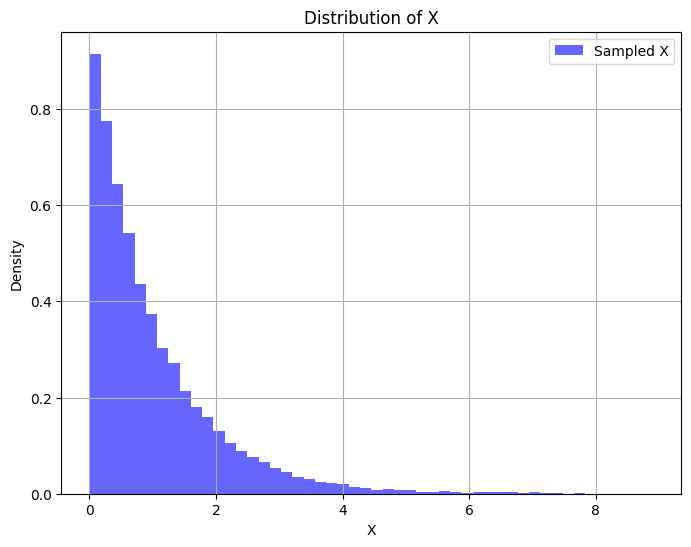

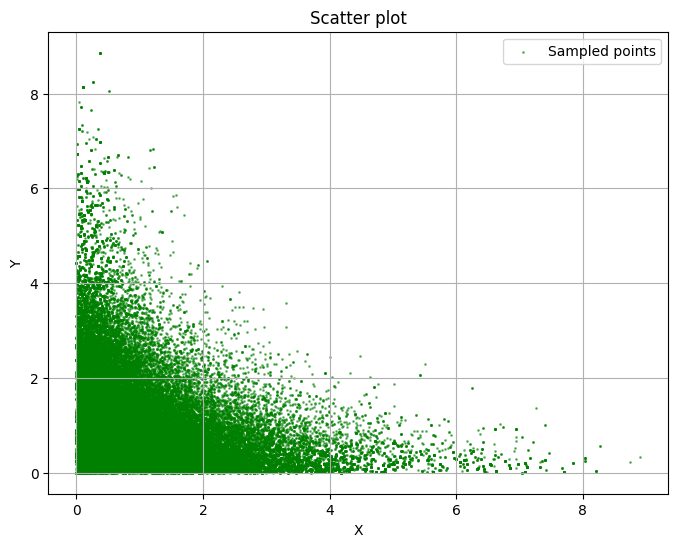

In [16]:
import numpy as np
import matplotlib.pyplot as plt

T = 10**5

def f(x, y): #density function
    if x > 0 and y > 0:
        return (1 + x+y+x*y/2)*np.exp(-(x+y+x*y/2))
    else:
        return 0

def metropolis_hastings(T): #algorithm for metropolis hastings
    x, y = np.random.uniform(), np.random.uniform() #generate two random numbers between [0,1] in a uniformly way, initializing
    some_values = [(x, y)] #list for all couples (x,y)

    for _ in range(T):
        x1, y1 = np.random.uniform(-1,1), np.random.uniform(-1,1) #proposal
        new_x, new_y = x + x1 , y + y1
        
        acceptance_ratio = min(1, f(new_x,new_y) / f(x,y)) #set acceptance ratio
        
        if np.random.uniform() < acceptance_ratio: #check value in comparison with acceptance ratio, [0,1]
            x, y = new_x, new_y
            
        some_values.append((x,y))

    return some_values

some_values = metropolis_hastings(T)

x_values = [x for x, y in some_values] #it keeps the value x in the couple (x,y)
y_values = [y for x, y in some_values] #it keeps the value y in the couple (x,y)

c_1 = 0 #counter for x
c_2 = 0 #counter for y

for x in x_values: #go through all x values
    if x > np.log(2): 
        c_1 = c_1 + 1 #add 1 if it is the case

P_X_1 = c_1 / len(x_values)

P_X_1X_2 = sum([1 for x, y in zip(x_values, y_values) if x*y > np.log(2)]) / len(x_values) #more compact because otherwise there are too much values to check (10^5 * 10^5 = 10^10)

print("Estimate of P(X_1 > log(2): ",P_X_1) #estimate of P(X_1 > log(2) )
print("Estimate of P(X_1 X_2 > log(2): ",P_X_1X_2) #estimate of P(X_1 X_2 > log(2) )

plt.figure(figsize=(8, 6))
plt.hist(x_values, bins=50, density=True, alpha=0.6, color='blue', label='Sampled X')
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Distribution of X')
plt.grid(True)
plt.legend()


plt.figure(figsize=(8, 6)) # Scatter plot
plt.scatter(x_values, y_values, s=1, alpha=0.5, color='green', label='Sampled points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot')
plt.grid(True)
plt.legend()

plt.show()